<a href="https://colab.research.google.com/github/junting-huang/data_storytelling/blob/main/case_2_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# case_2. number

## 2.1 importing library

In [15]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## 2.2 importing corpus

In [16]:
# Reading the literary work from a text file
filename = 'walden.txt'

with open(filename, 'r', encoding='utf-8') as file:
    text = file.read()

## 2.3 tokenizing the text

In [17]:
# Downloading the Punkt Tokenizer Models
nltk.download('punkt')
nltk.download('stopwords')

# Tokenizing the text
tokens = word_tokenize(text.lower())  # Convert text to lowercase and tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Removing stopwords and punctuation
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]

# Counting word frequencies
word_frequencies = nltk.FreqDist(filtered_tokens)

## 2.4 counting words

In [19]:
# Creating a DataFrame
df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])

# Sorting the DataFrame by Frequency
df = df.sort_values(by='Frequency', ascending=False)

## 2.5 plotting the graph

<Figure size 2000x600 with 0 Axes>

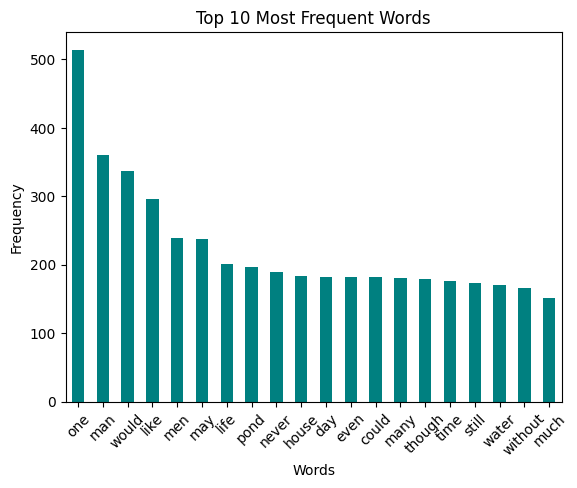

In [20]:
# Plotting the top 20 frequent words
plt.figure(figsize=(20,6))
df.head(20).plot(x='Word', y='Frequency', kind='bar', legend=False, color='teal')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 2.5 term frequency - inverse document frequency (TF-IDF)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = nltk.sent_tokenize(text)
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)

In [22]:
# Getting feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Summing the TF-IDF scores for each word
word_importance = tfidf_matrix.sum(axis=0)

# Creating a DataFrame to store words and their importance
df = pd.DataFrame(word_importance.T, index=feature_names, columns=["Importance"])

# Sorting the DataFrame by Importance
df = df.sort_values(by='Importance', ascending=False)

<Figure size 2000x600 with 0 Axes>

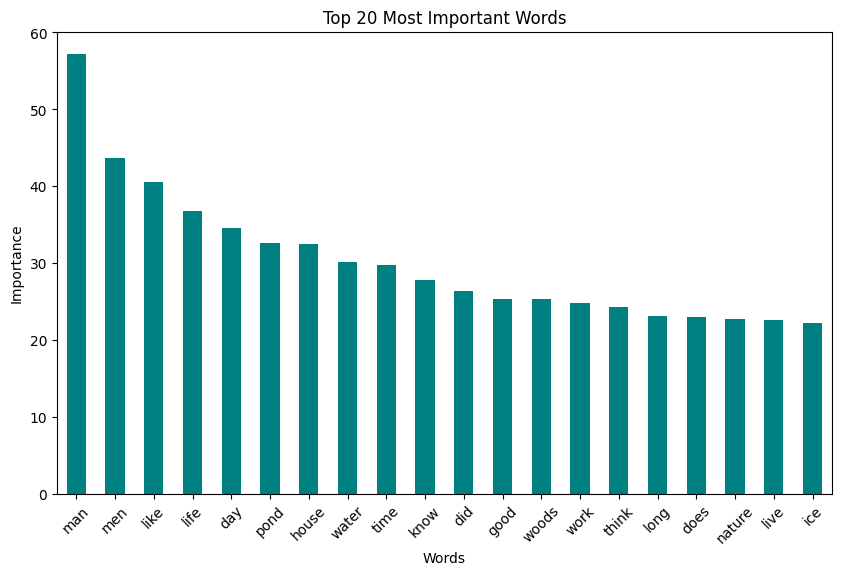

In [23]:
# Plotting the top 20 most important words
plt.figure(figsize=(20,6))
df.head(20).plot(kind='bar', legend=False, color='teal', figsize=(10,6))
plt.title('Top 20 Most Important Words')
plt.xlabel('Words')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()